In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
df=pd.read_csv(r"C:\Users\asbid\Downloads\sentiment analysis.txt",names=['Sentences','labels'],sep='\t')

In [3]:
df

,Sentences,labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df['Sentences']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Sentences, Length: 1000, dtype: object

In [5]:
import re
def denoise(text):
  text=text.lower()
  text=re.sub('r[^a-zA-Z0-9\s]','',text)
  return text

In [6]:
df['Sentences']=df['Sentences'].apply(denoise)

In [7]:
df['Sentences']

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Sentences, Length: 1000, dtype: object

In [8]:
import gensim

In [9]:
from gensim.parsing.preprocessing import remove_stopwords

In [10]:
df['Sentences']=df['Sentences'].apply(remove_stopwords)

In [11]:
df['Sentences']

0                                    wow... loved place.
1                                            crust good.
2                                   tasty texture nasty.
3      stopped late bank holiday rick steve recommend...
4                           selection menu great prices.
                             ...                        
995                   think food flavor texture lacking.
996                             appetite instantly gone.
997                              overall impressed back.
998    experience underwhelming, think we'll ninja su...
999    then, hadn't wasted life there, poured salt wo...
Name: Sentences, Length: 1000, dtype: object

In [12]:
corpus=df['Sentences'][0:1000].values
corpus

array(['wow... loved place.', 'crust good.', 'tasty texture nasty.',
       'stopped late bank holiday rick steve recommendation loved it.',
       'selection menu great prices.', 'getting angry want damn pho.',
       "honeslty didn't taste fresh.)",
       'potatoes like rubber tell ahead time kept warme',
       'fries great too.', 'great touch.', 'service prompt.', 'back.',
       'cashier care ended wayyy overpriced.',
       'tried cape cod ravoli, chicken,with cranberry...mmmm!',
       'disgusted pretty sure human hai',
       'shocked signs indicate cash only.', 'highly recommended.',
       'waitress little slow service.', 'place worth time, let vegas.',
       'like all.', 'burrittos blah!', 'food, amazing.', 'service cute.',
       'care less... interior beautiful.', 'performed.',
       "that's right....the red velvet cake.....ohhh stuff good.",
       '- brought salad asked fo',
       'hole wall great mexican street tacos, friendly staff.',
       'took hour food 4 table

In [13]:
unique_words=[]
for sentence in corpus:
  sen=sentence.split()
  for word in sen:
    if word not in unique_words:
      unique_words.append(word)

In [14]:
total_words=len(unique_words)
total_words

2495

In [15]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
tokenizer=Tokenizer(num_words=total_words)

In [37]:
x=tokenizer.fit_on_texts(corpus)

In [18]:
sequences=tokenizer.texts_to_sequences(corpus)

In [39]:
sequences

[[314, 71, 2],
 [459, 3],
 [61, 315, 316],
 [460, 317, 764, 765, 766, 767, 318, 71, 14],
 [72, 38, 5, 73],
 [102, 768, 49, 232, 149],
 [769, 50, 51, 44],
 [319, 6, 770, 150, 771, 7, 169, 772],
 [85, 5, 170],
 [5, 461],
 [4, 773],
 [10],
 [462, 320, 463, 774, 127],
 [128, 775, 776, 777, 36, 778, 779, 464],
 [780, 19, 103, 465, 781],
 [782, 783, 784, 785, 466],
 [233, 321],
 [104, 74, 62, 4],
 [2, 75, 7, 467, 17],
 [6, 105],
 [786, 787],
 [1, 15],
 [4, 468],
 [320, 788, 789, 322],
 [790],
 [791, 86, 323, 469, 792, 793, 794, 470, 3],
 [324, 39, 171, 234],
 [795, 325, 5, 471, 796, 235, 9, 24],
 [106, 236, 1, 237, 172, 11, 1, 797, 129, 798, 238, 6, 326, 472],
 [40, 239, 327],
 [799, 6, 328, 85, 151, 800, 473, 130],
 [6, 801, 802],
 [2, 803, 804],
 [6, 3, 173, 2, 805, 474, 806, 807, 1, 475, 240, 329],
 [107, 6, 2, 131],
 [808, 45, 11, 476],
 [809, 174, 3, 73],
 [152, 4, 175, 63, 6, 810, 7, 20, 87],
 [241, 811, 477],
 [4, 330],
 [153, 242, 331],
 [130, 3, 812, 243, 25],
 [154, 478, 332, 3, 47

In [19]:
max_len=max(len(x) for x in sequences)
max_len

20

In [20]:
padded_seq=pad_sequences(sequences,padding='post',maxlen=max_len)

In [21]:
padded_seq

array([[ 314,   71,    2, ...,    0,    0,    0],
       [ 459,    3,    0, ...,    0,    0,    0],
       [  61,  315,  316, ...,    0,    0,    0],
       ...,
       [ 107,  122,   10, ...,    0,    0,    0],
       [  22,  509,   37, ...,    0,    0,    0],
       [ 735, 1965, 1966, ...,    0,    0,    0]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded_seq,df['labels'])

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 20)
(250, 20)
(750,)
(250,)


In [24]:
from keras import models,layers
from keras.models import Sequential
from keras.layers import Embedding,LSTM,SimpleRNN,Dropout,Dense,SpatialDropout1D
from keras.callbacks import EarlyStopping

In [25]:
model=Sequential()
model.add(Embedding(len(unique_words),input_length=20,output_dim=20))
model.add(SimpleRNN(10))

model.add(Dense(32,activation='relu'))
model.add(Dense((1),activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 20)            49900     
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                310       
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 50,595
Trainable params: 50,595
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 0.7004 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5600
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6853 - val_loss: 0.6797 - val_accuracy: 0.5920
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5481 - accuracy: 0.8947 - val_loss: 0.5766 - val_accuracy: 0.7320
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.9573 - val_loss: 0.5103 - val_accuracy: 0.7560
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9720 - val_loss: 0.5551 - val_accuracy: 0.7600
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9907 - val_loss: 0.5958 - val_accuracy: 0.7520
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9933 - val_loss: 0.6121 - val_accuracy: 0.7880
Epoch 8/50
24/24 [=

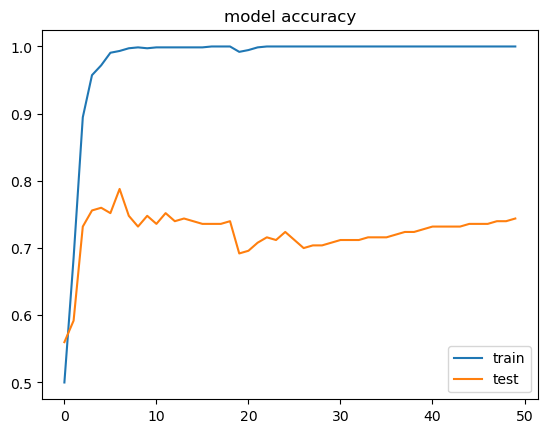

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train','test'])
plt.show()

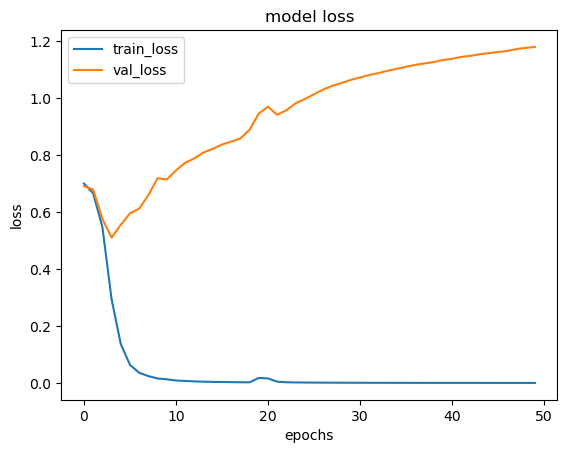

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [30]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 1.1800 - accuracy: 0.7440


[1.1799503564834595, 0.7440000176429749]

In [31]:
import numpy as np
threshold = 0.1
y_pred=model.predict(x_test)
y_pred_test = np.where(y_pred >= threshold, 1, 0)

8/8 [==============================] - 0s 1ms/step


In [32]:
y_pred.shape

(250, 1)

In [33]:
#y_pred_test

In [34]:
#y_pred

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,r2_score

In [36]:
accuracy_score(y_test,y_pred_test)*100

70.8